# Import libs

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import scipys
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

from google.colab import drive 
drive.mount('/content/gdrive')

ModuleNotFoundError: ignored

In [3]:
!pip install quandl

# Login on quandle

In [ ]:
import quandl

quandl.ApiConfig.api_key = 'DgDSQ2L3HnxbUrnxhmdi'

# Get gross domestic product

In [ ]:
GDP = quandl.get('FRED/GDP', start_date='2010-01-01', end_date='2020-06-30')
GDP.head()

,Value
Date,
2010-01-01,14764.611
2010-04-01,14980.193
2010-07-01,15141.605
2010-10-01,15309.471
2011-01-01,15351.444


In [ ]:
def plot(data, title, xlabel, ylabel):
  fig, ax = plt.subplots()
  ax.plot(data)
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_autoscaley_on(1)

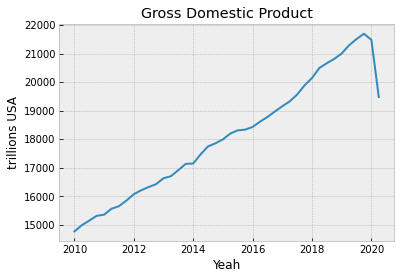

In [ ]:
plot(GDP,'Gross Domestic Product','Yeah','trillions USA')

In [ ]:
print(GDP.index)
GDP.index = GDP.index.to_period(freq='Q')
print(GDP.index)

DatetimeIndex(['2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01'],
              dtype='datetime64[ns]', name='Date', freq=None)
PeriodIndex(['2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2',
             '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4',
             '2013Q1', '2013Q2', '2013

In [ ]:
GDP.head()

,Value
Date,
2010Q1,14764.611
2010Q2,14980.193
2010Q3,15141.605
2010Q4,15309.471
2011Q1,15351.444


In [ ]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 42 entries, 2010Q1 to 2020Q2
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


#Get Reference Price for the OPEC Crude Oil Basket

In [ ]:
opec_oil = quandl.get('OPEC/ORB',start_date='2010-01-01', end_date='2020-06-30')
opec_oil.head()

,Value
Date,
2010-01-04,78.23
2010-01-05,79.14
2010-01-06,79.70
2010-01-07,80.19
2010-01-08,79.94


In [ ]:
opec_oil.index = opec_oil.index.to_period(freq='D')
print(opec_oil.index)

PeriodIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
             '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
             '2010-01-14', '2010-01-15',
             ...
             '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
             '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
             '2020-06-29', '2020-06-30'],
            dtype='period[D]', name='Date', length=2706, freq='D')


In [ ]:
opecoil_quartal = opec_oil.resample(rule='Q').mean()
opecoil_quartal.head()
opecoil_quartal.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 42 entries, 2010Q1 to 2020Q2
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


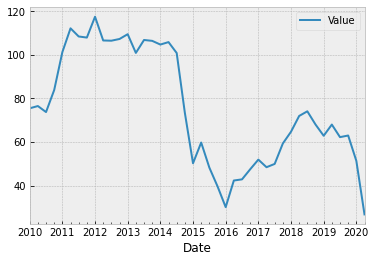

In [ ]:
opecoil_quartal.plot()

In [ ]:
#Dataset = Dataset.merge(opecoil_quartal,on='Date', how='left')
#Dataset.rename(columns={'Value': 'OPEC crude oil, $'},inplace=True)
Dataset.head()

#Get USD/RUB 

In [ ]:
USD_RUB= pd.read_csv('gdrive/My Drive/USD_RUB.csv',index_col = 'Дата', decimal=',')
USD_RUB.head()

In [ ]:
USD_RUB = USD_RUB[['Цена']].copy()
USD_RUB.head()

In [ ]:
USD_RUB.rename(columns={'Цена': '$ in rub'},inplace=True)
USD_RUB.rename_axis('Date',inplace=True)
USD_RUB.head()

In [ ]:
USD_RUB = USD_RUB.iloc[::-1]

In [ ]:
USD_RUB.index = pd.to_datetime(USD_RUB.index, format='%d.%m.%Y')
USD_RUB.head()

In [ ]:
#USD_RUB.index = USD_RUB.index.to_period(freq='D')
USDRUB_quartal = USD_RUB.resample(rule='Q').mean()
USDRUB_quartal.head()

# Join to dataset new data

In [ ]:
#Dataset = Dataset.merge(USDRUB_quartal,on='Date', how='left')
#Dataset.rename(columns={'RUB per USD': 'Dollar rate'},inplace=True)
Dataset.head()

#Save dataset to google drive 

In [ ]:
#Dataset.to_csv('Dataset.csv',sep=',')
#!cp Dataset.csv "drive/My Drive/"

#Get Brent oil price

In [ ]:
brent_oil = quandl.get('FRED/DCOILBRENTEU', start_date='2010-01-01', end_date='2020-06-30')
brent_oil.head()

In [ ]:
brent_oil.index = brent_oil.index.to_period(freq='D')
print(brent_oil.index)

In [ ]:
brentoil_quartal = brent_oil.resample(rule='Q').mean()
brentoil_quartal.head()

In [ ]:
brentoil_quartal.rename(columns={'Value': 'Brent crude oil, $'},inplace=True)
brentoil_quartal.head()

In [ ]:
#Dataset.drop(columns='Brent crude oil, $', axis=1, inplace=True)
#Dataset = Dataset.merge(brentoil_quartal,on='Date', how='left')
#Dataset.style.set_properties(**{'text-align': 'left'})
Dataset.head()

#Get Henry Hub gas price

In [ ]:
henryhub_gas = quandl.get('FRED/DHHNGSP', start_date='2010-01-01', end_date='2020-06-30')
henryhub_gas.head()

In [ ]:
henryhub_gas.index = henryhub_gas.index.to_period(freq='D')
print(henryhub_gas.index)

In [ ]:
hhgas_quartal = henryhub_gas.resample(rule='Q').mean()
hhgas_quartal.head()

In [ ]:
hhgas_quartal.rename(columns={'Value': 'Henry Hub gas spot price, $'},inplace=True)
hhgas_quartal.head()

In [ ]:
#Dataset = Dataset.merge(hhgas_quartal,on='Date', how='left')
Dataset.rename(columns={'Dollar rate': 'Dollar rate, rub'},inplace=True)
Dataset.head()

# Get Freight Transportation Services Index

In [ ]:
freight_transp = quandl.get('FRED/TSIFRGHT', start_date='2010-01-01', end_date='2020-06-30')
freight_transp.head()

In [ ]:
freight_transp.index = freight_transp.index.to_period(freq='D')
print(freight_transp.index)

In [ ]:
freighttransp_quartal = freight_transp.resample(rule='Q').mean()
freighttransp_quartal.head()

In [ ]:
freighttransp_quartal.rename(columns={'Value': 'Chain-type Freight Index 2000=100'},inplace=True)
freighttransp_quartal.head()

In [ ]:
#Dataset = Dataset.merge(freighttransp_quartal,on='Date', how='left')
#Dataset.rename(columns={'Dollar rate': 'Dollar rate, rub'},inplace=True)
Dataset.head()

#Get the breakeven inflation rate

In [ ]:
infl_rate = quandl.get('FRED/T10YIE', start_date='2010-01-01', end_date='2020-06-30')
infl_rate.head()

In [ ]:
infl_rate.index = infl_rate.index.to_period(freq='D')
print(infl_rate.index)

In [ ]:
inflrate_quartal = infl_rate.resample(rule='Q').mean()
inflrate_quartal.head()

In [ ]:
inflrate_quartal.rename(columns={'Value': '10-Year Breakeven Inflation Rate, %'},inplace=True)
inflrate_quartal.head()

In [ ]:
Dataset = Dataset.merge(inflrate_quartal,on='Date', how='left')
#Dataset.rename(columns={'Dollar rate': 'Dollar rate, rub'},inplace=True)
Dataset.head()

# Get discount Window Primary Credit Rate

In [ ]:
cred_rate = quandl.get('FRED/DPCREDIT', start_date='2010-01-01', end_date='2020-06-30')
cred_rate.head()

In [ ]:
cred_rate.index = cred_rate.index.to_period(freq='D')
print(cred_rate.index)

In [ ]:
credrate_quartal = cred_rate.resample(rule='Q').mean()
credrate_quartal.head()

In [ ]:
credrate_quartal.rename(columns={'Value': 'Discount Window Primary Credit Rate, %'},inplace=True)
credrate_quartal.head()

In [ ]:
Dataset = Dataset.merge(credrate_quartal,on='Date', how='left')
#Dataset.rename(columns={'Dollar rate': 'Dollar rate, rub'},inplace=True)
Dataset.head()

# Save finished dataset

In [ ]:
Dataset.to_csv('Dataset.csv',sep=',')
!cp Dataset.csv "drive/My Drive/"


# Look at financial data

In [ ]:
fin_data= pd.read_excel('gdrive/My Drive/DEV_financials.xlsx')
fin_data.head()


,Unnamed: 0,ticker,report_date,PL__Revenue,PL__Cost of Revenue,PL__Gross Profit,PL__Gross margin,PL__Other Operating Income,PL__Operating Expenses,"PL__Selling, General & Admin",PL__Research & Development,PL__Depreciation & Amortization,PL__Prov. For Doubful Accounts,PL__Other Operating Expenses,PL__Operating Income,PL__Operating Margin,PL__Non-Operating Income (Loss),"PL__Interest Expense, Net",PL__Interest Expense,PL__Interest Income,PL__Other Investment Income (Loss),PL__Foreign Exch Gain (Loss),PL__Income (Loss) from Affiliates (Pre Tax),PL__Other Non-Op Income (Loss),PL__Pretax Income,PL__Income Taxes,PL__Income (Loss) from Affiliates (After Tax),PL__Income (Loss) from Cont Ops,PL__Net Extraordinary Items,PL__Discontinued Operations NI,PL__XO & Accounting Changes,PL__Minority Interest,PL__Net Income,PL__Preferred Dividends,PL__Other Adjustments,PL__Net Income Avail to Common,"PL__Net Income Avail to Common, Adj",PL__Net Abnormal Losses (Gains),PL__Net Extraordinary Losses (Gains),PL__Depreciation,...,BS__Total Capital,BS__Line of Credit,BS__Line of Credit Available,BS__Line of Credit Used,CF__Net Income,CF__Dep & Amort,CF__NonCash Items,CF__StockBased Compensation,CF__Deferred Income Taxes,CF__Change in Working Capital,CF__Net Cash From Disc Ops,CF__Cash from Operations,CF__Change in Fixed & Intang,CF__Capex,CF__Dec in LT Investment,CF__Inc in LT Investment,CF__Net Cash From Acq & Div,CF__Cash from Divestitures,CF__Cash for Acq of Subs,CF__Cash for JVs,CF__Other Investing Activities,CF__Cash from Investing Activities,CF__Dividends Paid,CF__Cash From (Repayment) Debt,CF__Cash From (Repay) ST Debt,CF__Cash From LT Debt,CF__Repayments of LT Debt,CF__Cash (Repurchase) of Equity,CF__Other Financing Activities,CF__Cash from Financing Activities,CF__Effect of Foreign Exchanges,CF__Net Changes in Cash,CF__Free Cash Flow,CF__Free Cash Flow to Firm,CF__Free Cash Flow to Equity,CF__Cash Paid for Taxes,CF__Cash Paid for Interest,CF__Cash Paid for Preferred Div,name,industry
0,0,AMPY,2011-04-01,0.000,0.000,0.000,0.000000,0.0,0.000,0.000,0,0.0,0.0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0,0,0.0,0.0,0.000,0.00000,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,NaN,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000000,0.00,0.0,0.000,0,Amplify Energy Corp (AMPY),oil
1,1,AMPY,2011-07-01,0.000,0.000,0.000,0.000000,0.0,0.000,0.000,0,0.0,0.0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0,0,0.0,0.0,0.000,0.00000,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,NaN,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000000,0.00,0.0,0.000,0,Amplify Energy Corp (AMPY),oil
2,2,AMPY,2011-10-01,0.000,0.000,0.000,0.000000,0.0,0.000,0.000,0,0.0,0.0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0,0,0.0,0.0,0.000,0.00000,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,NaN,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000000,0.00,0.0,0.000,0,Amplify Energy Corp (AMPY),oil
3,3,AMPY,2012-01-01,61.863,36.854,25.009,0.404264,0.0,57.298,53.396,0,0.0,0.0,3.902,32.289,0.000000,1.351,1.351,1.359,0.008,0,0,0.0,0.0,33.640,7.94885,0.0,56.351,0.0,0.0,0.0,0.0,41.588848,0.0,0.0,41.588848,41.588848,14.76215,0.0,0.0,...,520.302016,300.0,0.2,NaN,56.351,30.059,75.649,51.972,0.0,11.118,0.0,38.239,79.880,79.880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.880,0.0,36.2,0.0,36.2,0.0,2.7,0.135,38.765,0.0,2.876,41.641,0.000000,0.00,0.0,0.000,0,Amplify Energy Corp (AMPY),oil
4,4,AMPY,2012-04-01,48.410,34.628,13.782,0.284693,0.0,11.440,6.064,0,0.0,0.0,5.376,2.342,0.048378,1.683,1.683,1.690,0.007,0,0,0.0,0.0,0.659,6.35810,0.0,17.507,0.0,0.0,0.0,0.0,5.699100,0.0,0

## Filter only needed information

In [ ]:
filtred_data = fin_data[['report_date', 'ticker', 'PL__Revenue', 'PL__Cost of Revenue', 'PL__Other Operating Income', 'PL__Operating Expenses']]
filtred_data.head()

,report_date,ticker,PL__Revenue,PL__Cost of Revenue,PL__Other Operating Income,PL__Operating Expenses
0,2011-04-01,AMPY,0.000,0.000,0.0,0.000
1,2011-07-01,AMPY,0.000,0.000,0.0,0.000
2,2011-10-01,AMPY,0.000,0.000,0.0,0.000
3,2012-01-01,AMPY,61.863,36.854,0.0,57.298
4,2012-04-01,AMPY,48.410,34.628,0.0,11.440


In [ ]:
filtred_data['Operating_Income'] = fin_data['PL__Revenue'] - fin_data['PL__Cost of Revenue'] + fin_data['PL__Other Operating Income'] - fin_data['PL__Operating Expenses']
filtred_data.head()

,report_date,ticker,PL__Revenue,PL__Cost of Revenue,PL__Other Operating Income,PL__Operating Expenses,Operating_Income
0,2011-04-01,AMPY,0.000,0.000,0.0,0.000,0.000
1,2011-07-01,AMPY,0.000,0.000,0.0,0.000,0.000
2,2011-10-01,AMPY,0.000,0.000,0.0,0.000,0.000
3,2012-01-01,AMPY,61.863,36.854,0.0,57.298,-32.289
4,2012-04-01,AMPY,48.410,34.628,0.0,11.440,2.342


In [ ]:
filtred_data['report_date'] = filtred_data['report_date'].dt.to_period(freq='Q')

filtred_data.head()

,report_date,ticker,PL__Revenue,PL__Cost of Revenue,PL__Other Operating Income,PL__Operating Expenses,Operating_Income
0,2011Q2,AMPY,0.000,0.000,0.0,0.000,0.000
1,2011Q3,AMPY,0.000,0.000,0.0,0.000,0.000
2,2011Q4,AMPY,0.000,0.000,0.0,0.000,0.000
3,2012Q1,AMPY,61.863,36.854,0.0,57.298,-32.289
4,2012Q2,AMPY,48.410,34.628,0.0,11.440,2.342


## Transform data to index

In [ ]:
filtred_data.set_index(['ticker', 'report_date'], inplace=True)

## Save dataset to google disk

In [ ]:
from google.colab import drive
drive.mount('drive')
filtred_data.to_csv('Fin_info.csv',sep=',')
!cp Fin_info.csv 'drive/My Drive/'

Mounted at drive


## Select the company by ticker

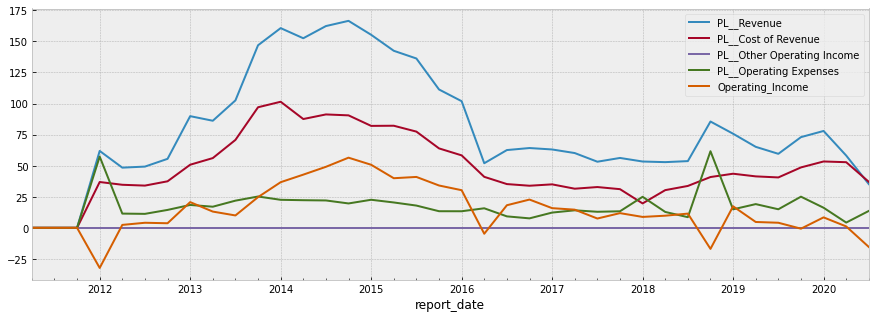

In [ ]:
filtred_data.loc['AMPY'].plot(figsize=(15,5))

## Select list of tickers

In [ ]:
tickers = filtred_data.index.get_level_values(0).unique()
print(tickers)

Index(['AMPY', 'APA', 'AR', 'BATL', 'BCEI', 'BRY', 'BSM', 'CDEV', 'CHK', 'CLR',
       'CNX', 'COG', 'COP', 'CPE', 'CRBO', 'CRC', 'CRK', 'DEN', 'DVN', 'EGY',
       'EOG', 'EQT', 'ESTE', 'FANG', 'GDP', 'HES', 'LONE', 'LPI', 'MCF', 'MGY',
       'MNRL', 'MRO', 'MTDR', 'MUR', 'NOG', 'OAS', 'OVV', 'PDCE', 'PVAC',
       'PXD', 'REI', 'RRC', 'SBOW', 'SD', 'SM', 'SWN', 'TALO', 'TPL', 'VNOM',
       'WLL', 'WTI', 'XEC', 'XOG'],
      dtype='object', name='ticker')


## Plot curves all companies

In [ ]:
def show_graf():
  for ticker in tickers:
    fig = plt.figure(figsize=(15, 5))   
    filtred_data.loc[ticker].plot()    
    plt.title(ticker, weight="bold")   
    plt.show()

In [ ]:
show_graf()

Output hidden; open in https://colab.research.google.com to view.

# Analyze revenue data

In [ ]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
!pip install ml_metrics
import ml_metrics as metrics
rev = filtred_data.loc['AMPY','PL__Revenue']

info = rev.describe()

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7845 sha256=053e961d68d673766c6039841b13e4baa6e12f8c365a1b1370a15dd476f996bd
  Stored in directory: /root/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics


## Variance

In [ ]:
print('V = %f' % (info['std']/info['mean']))

V = 0.568530


In [ ]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(rev)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print(itog)

        JB               p-value              skew             kurtosis    
---------------------------------------------------------------------------
1.5866061182016713 0.45234819214592303 0.4418008780501386 2.529558761758055
---------------------------------------------------------------------------


In [ ]:
test = sm.tsa.adfuller(rev)
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -1.7706706252209687
p-value:  0.39511702965289086
Critical values:  {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
есть единичные корни, ряд не стационарен


In [ ]:
rev1diff = rev.diff(periods=1).dropna()

In [ ]:
test = sm.tsa.adfuller(rev1diff)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -5.26855271701755
p-value:  6.359606167549108e-06
Critical values:  {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}
единичных корней нет, ряд стационарен


In [ ]:
m = rev1diff.index[len(rev1diff.index)/2+1]
r1 = sm.stats.DescrStatsW(rev1diff[m:])
r2 = sm.stats.DescrStatsW(rev1diff[:m])
print('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

IndexError: ignored

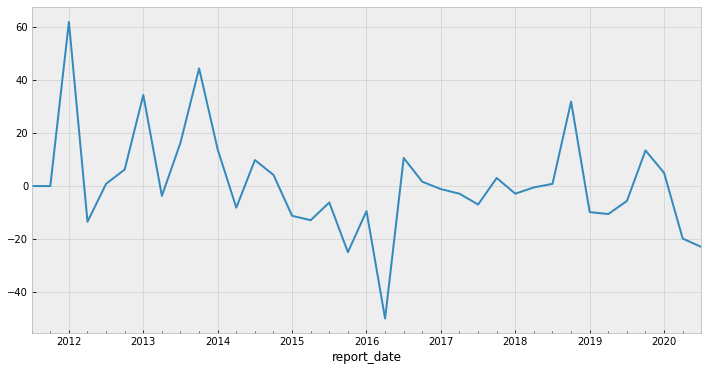

In [ ]:
rev1diff.plot(figsize=(12,6))